In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')
Assignments21:57


In [8]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [9]:
forest=pd.read_csv("/content/forestfires (2).csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [10]:
df = forest.copy()
df.drop(df.columns[11:30],axis=1,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [13]:
df.describe

<bound method NDFrame.describe of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3        

In [18]:

df.month.value_counts()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [19]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [20]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month)
df.day= label_encoder.fit_transform(df.day)
df.size_category= label_encoder.fit_transform(df.size_category)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [23]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [24]:
resamp = df.copy()

In [26]:
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

In [27]:
print(Counter(b))

Counter({1: 378, 0: 139})


In [30]:
smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)


In [31]:
print(Counter(b)) #removed bias in dataset

Counter({1: 370, 0: 370})


In [32]:
# Splitting the data into train and test
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [33]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [34]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/50
35/35 [==============================] - 4s 20ms/step - loss: 0.6909 - accuracy: 0.4986 - val_loss: 0.6871 - val_accuracy: 0.4854
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.5706 - val_loss: 0.6655 - val_accuracy: 0.5088
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.5677 - val_loss: 0.6628 - val_accuracy: 0.4854
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.7493 - val_loss: 0.5470 - val_accuracy: 0.8304
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.8876 - val_loss: 0.5059 - val_accuracy: 0.7076
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3979 - accuracy: 0.9020 - val_loss: 0.3463 - val_accuracy: 0.9649
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.2993 - accuracy: 0.9280 - val_loss: 0.2625 - val_accuracy: 0.9298
Epoch 8/50
35/35 [=

In [36]:
print(hist.history.keys())
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


,loss,accuracy,val_loss,val_accuracy,epoch
45,0.027502,0.988473,0.152248,0.929825,45
46,0.093816,0.968300,0.047197,0.970760,46
47,0.028587,0.982709,0.029695,0.988304,47
48,0.020875,0.991354,0.060495,0.964912,48
49,0.019787,0.994236,0.044213,0.976608,49


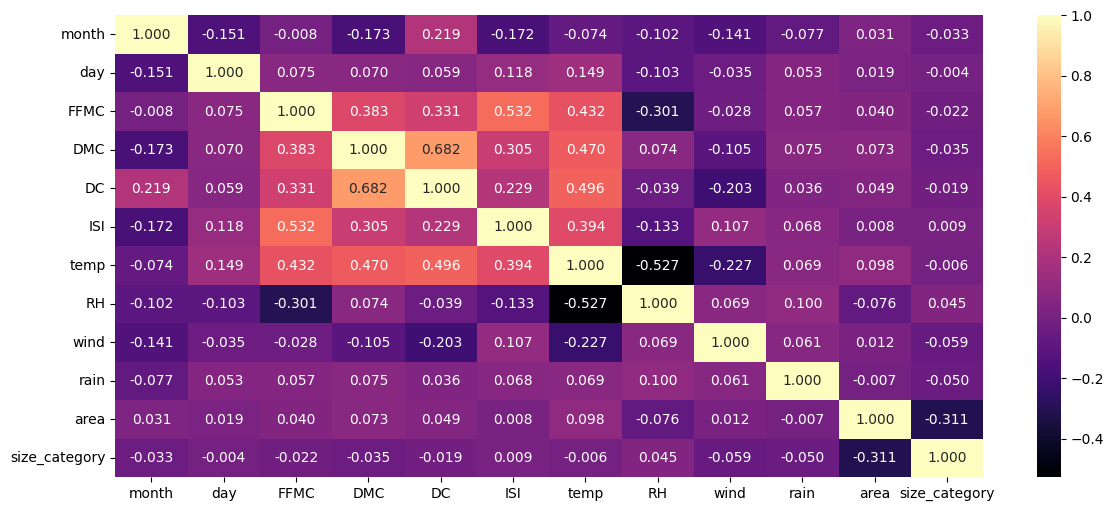

In [37]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

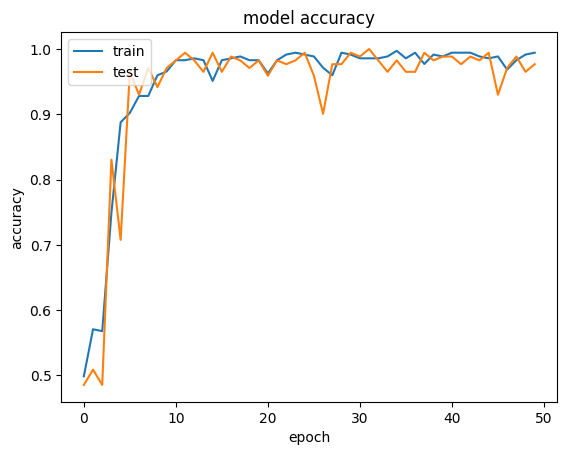

In [38]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

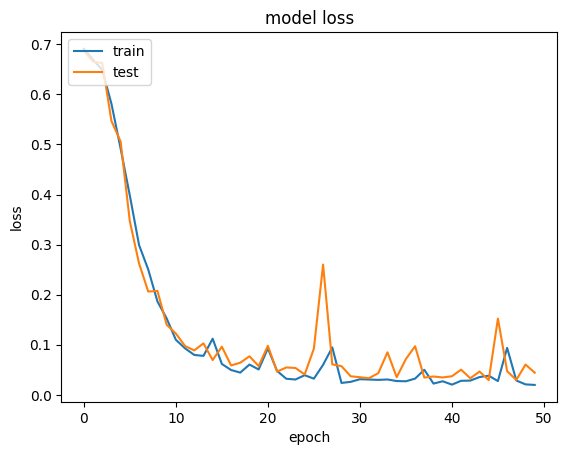

In [39]:
#summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')